In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv('data_bank.csv',)

In [34]:

data.head()

,Unnamed: 0,job,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,Person_ID
0,0,blue-collar,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,32081
1,1,technician,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,30183
2,2,management,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,3331
3,3,services,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,37574
4,4,retired,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,8654


In [6]:
data_profiling = data[['job','housing','loan','contact','y']].copy()

In [11]:
data_profiling = data_profiling.rename(columns={'y':'target'})
data_profiling['cnt'] = 1
data_profiling.head()

,job,housing,loan,contact,target,cnt
0,blue-collar,yes,no,cellular,0,1
1,technician,no,no,cellular,0,1
2,management,yes,no,cellular,1,1
3,services,no,no,cellular,0,1
4,retired,yes,no,cellular,1,1


In [49]:
df = pd.DataFrame()
for var in data_profiling.columns[:-2]:
    temp_df = pd.pivot_table(data = data_profiling, values='cnt',index = var,columns='target',aggfunc='count' ).reset_index()
    temp_df['Var'] = var
    temp_df = temp_df.rename(columns={var:'lvl',0:'target_0',1:'target_1'})
    temp_df['Obs'] = temp_df['target_0'] + temp_df['target_1']
    temp_df['target_1_%'] = temp_df['target_1']/temp_df['Obs'] *100
    temp_df['target_0_%'] = temp_df['target_0']/temp_df['Obs'] *100
    df = df.append(temp_df)
df = df[['Var','lvl','Obs','target_0','target_1','target_0_%','target_1_%']]

In [50]:
df

target,Var,lvl,Obs,target_0,target_1,target_0_%,target_1_%
0,job,admin.,10422,9070,1352,87.027442,12.972558
1,job,blue-collar,9254,8616,638,93.105684,6.894316
2,job,entrepreneur,1456,1332,124,91.483516,8.516484
3,job,housemaid,1060,954,106,90.000000,10.000000
4,job,management,2924,2596,328,88.782490,11.217510
5,job,retired,1720,1286,434,74.767442,25.232558
6,job,self-employed,1421,1272,149,89.514426,10.485574
7,job,services,3969,3646,323,91.861930,8.138070
8,job,student,875,600,275,68.571429,31.428571
9,job,technician,6743,6013,730,89.173958,10.826042


In [55]:
df[df['Var']=='job']['Var']

0     job
1     job
2     job
3     job
4     job
5     job
6     job
7     job
8     job
9     job
10    job
11    job
Name: Var, dtype: object

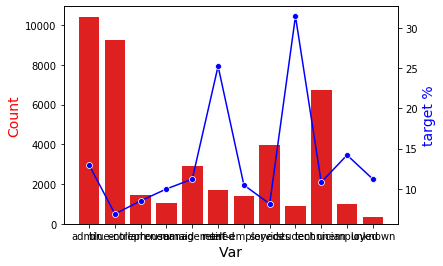

In [63]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
sns.barplot(df[df['Var']=='job']['lvl'], df[df['Var']=='job']['Obs'], color="red")
# set x-axis label
ax.set_xlabel("Var",fontsize=14)
# set y-axis label
ax.set_ylabel("Count",color="red",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
sns.lineplot(df[df['Var']=='job']['lvl'], df[df['Var']=='job']['target_1_%'], color="blue", marker="o")
ax2.set_ylabel("target %",color="blue",fontsize=14)
plt.show()
# # save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

In [64]:
import plotly

In [66]:
import plotly.graph_objects as go

In [70]:
fig = go.Figure()
fig.add_trace( go.Bar(name='Obs Count', x=df[df['Var']=='job']['lvl'], y=df[df['Var']=='job']['Obs']))
fig.add_trace(go.Scatter(name='target %', x=df[df['Var']=='job']['lvl'], y=df[df['Var']=='job']['target_1_%']))

In [71]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(name='Obs Count', x=df[df['Var']=='job']['lvl'], y=df[df['Var']=='job']['Obs']),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(name='target %', x=df[df['Var']=='job']['lvl'], y=df[df['Var']=='job']['target_1_%']),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

In [72]:

import pandas as pd

# Load dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.2f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.High.idxmax(),
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.2f" % df.High.max(),
                         ax=0, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.2f" % df.Low.mean(),
                        ax=-40, ay=40),
                   dict(x=df.High.idxmin(),
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.2f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Yahoo",
    xaxis_domain=[0.05, 1.0]
)

fig.show()